In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('train.csv')
display(titanic_df.head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* Passengerid
* survived: 0 = passed away, 1 = survived
* Pclass: Ticket Class, 1 = First class, 2 = Second class, 3 = Third class
* sex: male/female
* name
* Age
* sibsp: Number of sibling/spouse
* parch: Number of parent/child
* ticket: Ticket number
* fare
* cabin: Room number
* embarked: Embarked ports C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
print('### Data Information ###\n')
print(titanic_df.info())

### Data Information ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
print('### Numerical Data Statistics ###\n')
titanic_df.describe()

### Numerical Data Statistics ###



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**EDA**

In [4]:
# Extract "object" columns
titanic_df.dtypes[titanic_df.dtypes=='object'].index.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [5]:
# Analyze "object" columns
print('Sex: \n', titanic_df['Sex'].value_counts())
print('\nCabin: \n', titanic_df['Cabin'].value_counts(dropna=False))
print('\nEmbarked: \n', titanic_df['Embarked'].value_counts(dropna=False))

Sex: 
 male      577
female    314
Name: Sex, dtype: int64

Cabin: 
 NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked: 
 S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


In [6]:
# Analyze survival rate by sex
titanic_df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

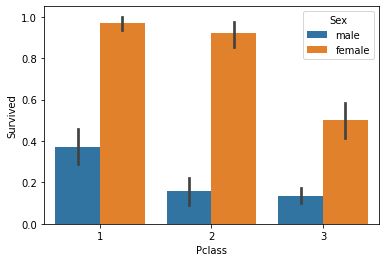

In [7]:
# Visualize survival rate by Pclass ans Sex
sns.barplot(x='Pclass',y='Survived', hue='Sex', data=titanic_df)

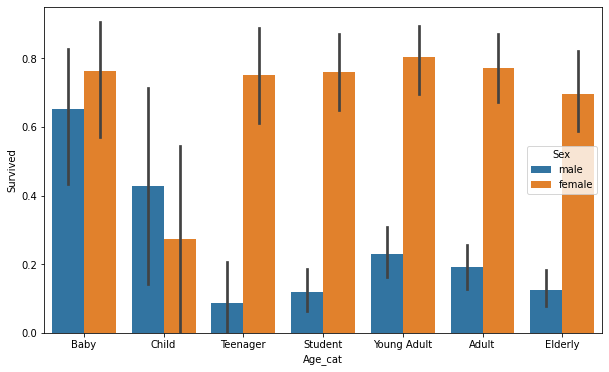

In [8]:
# Analyze survival rate by Age and Sex

def age_category(age):
  cat = ''
  if age <=5: cat = 'Baby'
  elif age <=12: cat = 'Child'
  elif age <=18: cat = 'Teenager'
  elif age <=25: cat = 'Student'
  elif age <=35: cat = 'Young Adult'
  elif age <=60: cat = 'Adult'
  else: cat = 'Elderly'
  return cat

# Adjust size of the figure
plt.figure(figsize=(10,6))

# Set category order for the graph
group_order = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# Make new column ('Age_cat') using 'Age' column (apply lambda)
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: age_category(x))

# Plot the graph
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df, order=group_order)

In [9]:
# Drop the Age_cat column
titanic_df.drop('Age_cat', axis=1, inplace=True)

**Data Preprocessing**

In [10]:
# Check how many null values are in the dataset
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Fill the null values
def fill_na(df):
  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
  titanic_df['Cabin'].fillna('N',inplace=True)
  titanic_df['Embarked'].fillna('N', inplace=True)
  return df

titanic_df = fill_na(titanic_df)

In [12]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
# Drop unnecessary columns
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
  return df
titanic_df = drop_features(titanic_df)
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,N,S


In [14]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

def label_encode(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

titanic_df = label_encode(titanic_df)

In [15]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


**Preprocess test dataset**

In [16]:
# Seperate features(X_train) and labels(y_train)
y_train = titanic_df['Survived']
X_train = titanic_df.drop('Survived', axis=1, inplace=False)

In [17]:
# Load test dataset
X_test = pd.read_csv('test.csv')
y_test = pd.read_csv('gender_submission.csv')
display(X_test.head())
display(y_test.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [18]:
# Preprocess test dataset
print(X_test.info())
print(X_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [19]:
# Drop features
X_test = drop_features(X_test)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [20]:
# Fill null values
X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)
X_test['Fare'].fillna(X_test['Fare'].mean(), inplace=True)
X_test['Cabin'].fillna('N',inplace=True)
# Label encode
X_test = label_encode(X_test)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,7,1
1,3,0,47.0,1,0,7.0000,7,2
2,2,1,62.0,0,0,9.6875,7,1
3,3,1,27.0,0,0,8.6625,7,2
4,3,0,22.0,1,1,12.2875,7,2


In [21]:
# Preprocess y_test
y_test = y_test['Survived']
display(y_test.head())
print(type(y_test))

<class 'pandas.core.series.Series'>


**ML Training**

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier accuracy: {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

DecisionTreeClassifier accuracy: 0.7392


**Cross Validation using Stratified Kfold**

In [24]:
# Stratified Kfold
from sklearn.model_selection import cross_val_score

titanic_features = pd.concat((X_train,X_test))
titanic_targets = pd.concat((y_train, y_test))

scores = cross_val_score(dt_clf, titanic_features, titanic_targets, cv=5)
for iter, accuracy in enumerate(scores):
  print('Cross Validation {0} accuracy: {1:.4f}'.format(iter,accuracy))
print('Overall accuracy: {0:.4f}'.format(scores.mean()))


Cross Validation 0 accuracy: 0.7748
Cross Validation 1 accuracy: 0.7824
Cross Validation 2 accuracy: 0.7634
Cross Validation 3 accuracy: 0.8893
Cross Validation 4 accuracy: 0.8889
Overall accuracy: 0.8198


**Hyper Parameter Tuning with GridSearchCV**

In [32]:
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    int64  
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,7,1
1,3,0,47.0,1,0,7.0000,7,2
2,2,1,62.0,0,0,9.6875,7,1
3,3,1,27.0,0,0,8.6625,7,2
4,3,0,22.0,1,1,12.2875,7,2


In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': list(range(1,11)),
              'min_samples_split': list(range(2,11)),
              'min_samples_leaf': list(range(1,11))}
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5, refit=True)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV best hyper parameters :', grid_dclf.best_params_)
print('GridSearchCV best accuracy: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# Predict with the best estimator with the best hyper parameters
predictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
print('DecisionTreeClassifier accuracy with the best hyper parameters : {0:.4f}'.format(accuracy))

GridSearchCV best hyper parameters : {'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 6}
GridSearchCV best accuracy: 0.8294
DecisionTreeClassifier accuracy with the best hyper parameters : 0.9282
